In [2]:
from pathlib import Path
import json

directory = Path("metrics/14-07-25")
files = [f for f in directory.iterdir() if f.is_file()]

In [5]:
from collections import defaultdict

data_by_prompt_checkpoint = defaultdict(lambda: defaultdict(dict))

for file in files:
    parts = file.stem.split('_')
    prompt_id = parts[-2]
    checkpoint_id = parts[-1]

    with open(str(file), 'r') as f:
        json_data = json.load(f)

    first_value = next(iter(json_data.values()))
    data_by_prompt_checkpoint[prompt_id][checkpoint_id] = first_value
    


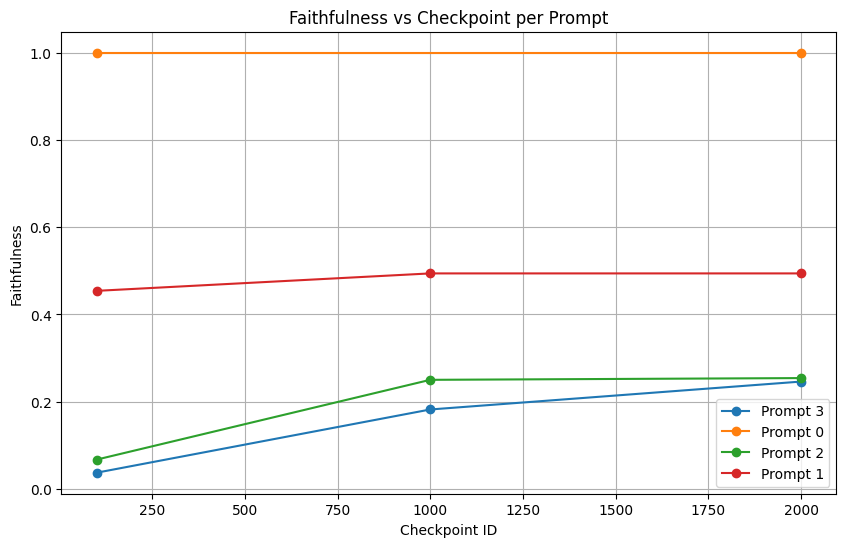

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for prompt_id, checkpoints in data_by_prompt_checkpoint.items():
    sorted_checkpoints = sorted(checkpoints.keys(), key=int)
    faithfulness_values = [checkpoints[c]['model_accuracy'] for c in sorted_checkpoints]
    

    plt.plot([int(c) for c in sorted_checkpoints], faithfulness_values, marker='o', label=f'Prompt {prompt_id}')

plt.xlabel('Checkpoint ID')
plt.ylabel('Faithfulness')
plt.title('Faithfulness vs Checkpoint per Prompt')
plt.legend()
plt.grid(True)
plt.show()